<a href="https://colab.research.google.com/github/BharathReddyRamasani/AI_DS/blob/main/Decison_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion='entropy'
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[46,  6],
       [ 7, 21]])

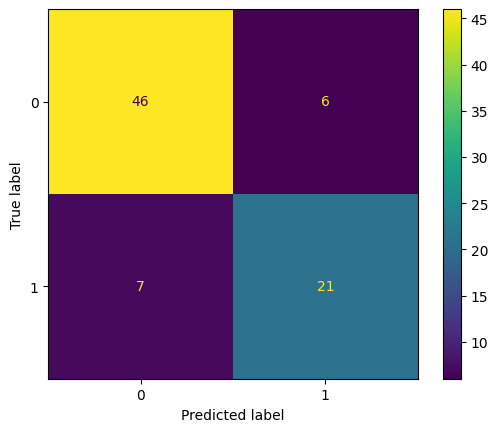

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.8375

In [ ]:
from sklearn.metrics import classification_report
print("report:\n",classification_report(y_test,y_pred))

report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



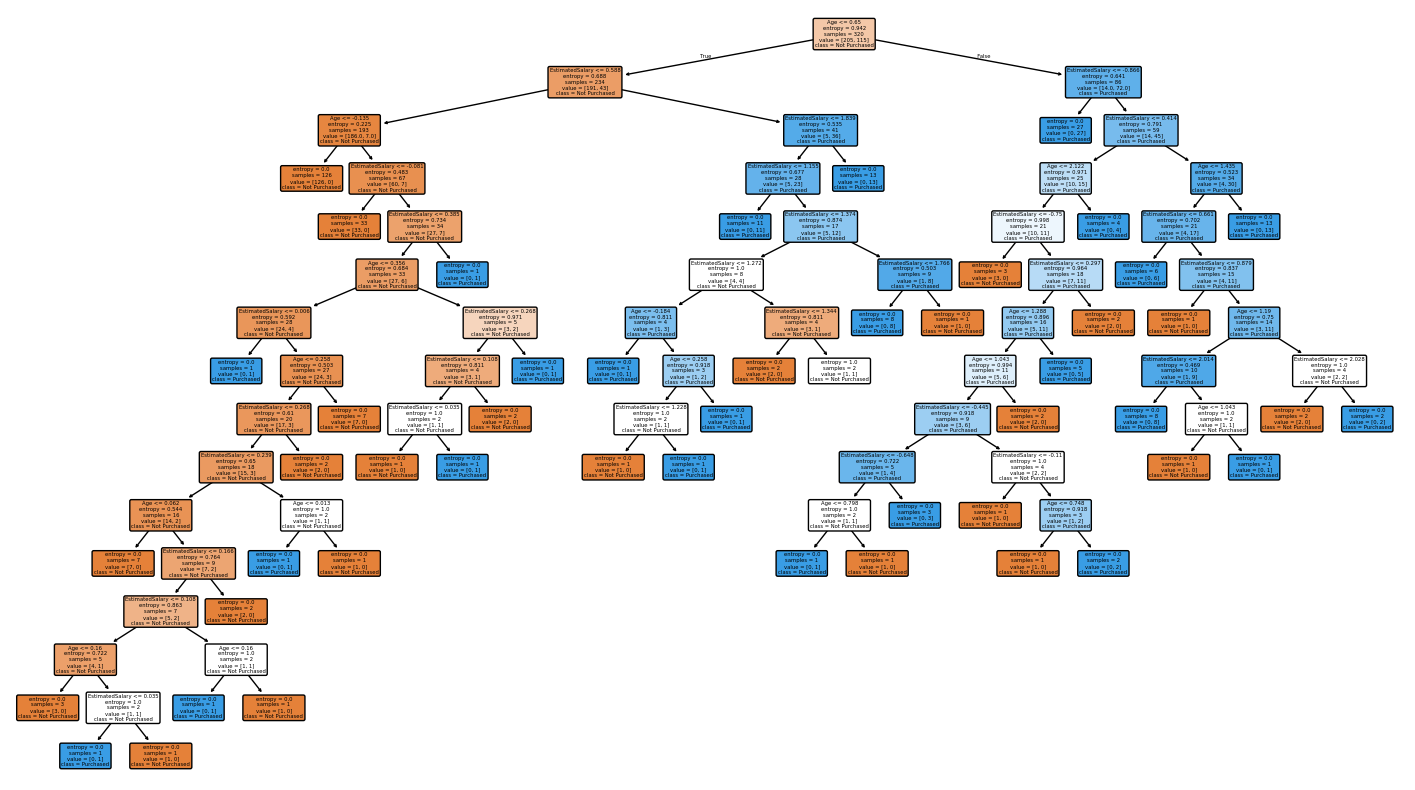

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(classifier,
          feature_names=['Age','EstimatedSalary'],
          class_names=['Not Purchased','Purchased'],
          filled=True,
          rounded=True)
plt.show()

changing depth of a tree....to injcrease accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

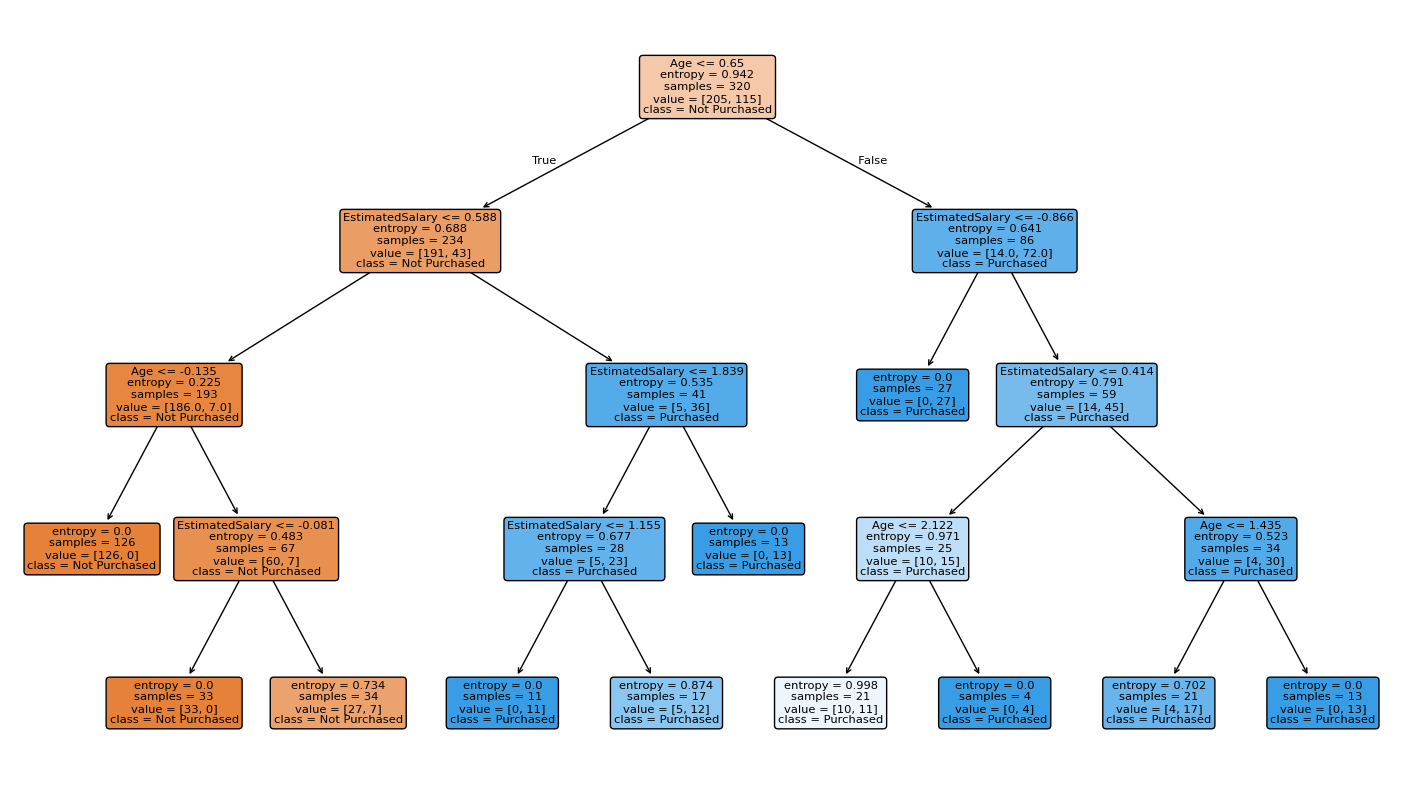

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(classifier,
          feature_names=['Age','EstimatedSalary'],
          class_names=['Not Purchased','Purchased'],
          filled=True,
          rounded=True)
plt.show()

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[47,  5],
       [ 2, 26]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9125

using titanic passenger data,our goal is top predict whether a passenger  survided or not based on their details

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df=df[['survived','pclass','sex','age','fare','embarked']]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [ ]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
fare,float64
embarked,object


In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

/tmp/ipython-input-1024298632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['embarked']=le.fit_transform(df['embarked'])
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [ ]:
x=df.drop('survived',axis=1)
y=df['survived']
x.head()


,pclass,sex,age,fare,embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2


In [ ]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
classifier=DecisionTreeClassifier(
    criterion='gini'
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[79, 26],
       [18, 56]])

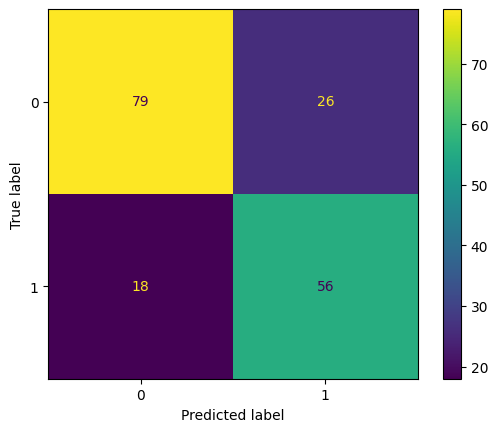

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7541899441340782

In [ ]:
from sklearn.metrics import classification_report
print("report:\n",classification_report(y_test,y_pred))

report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.68      0.76      0.72        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179



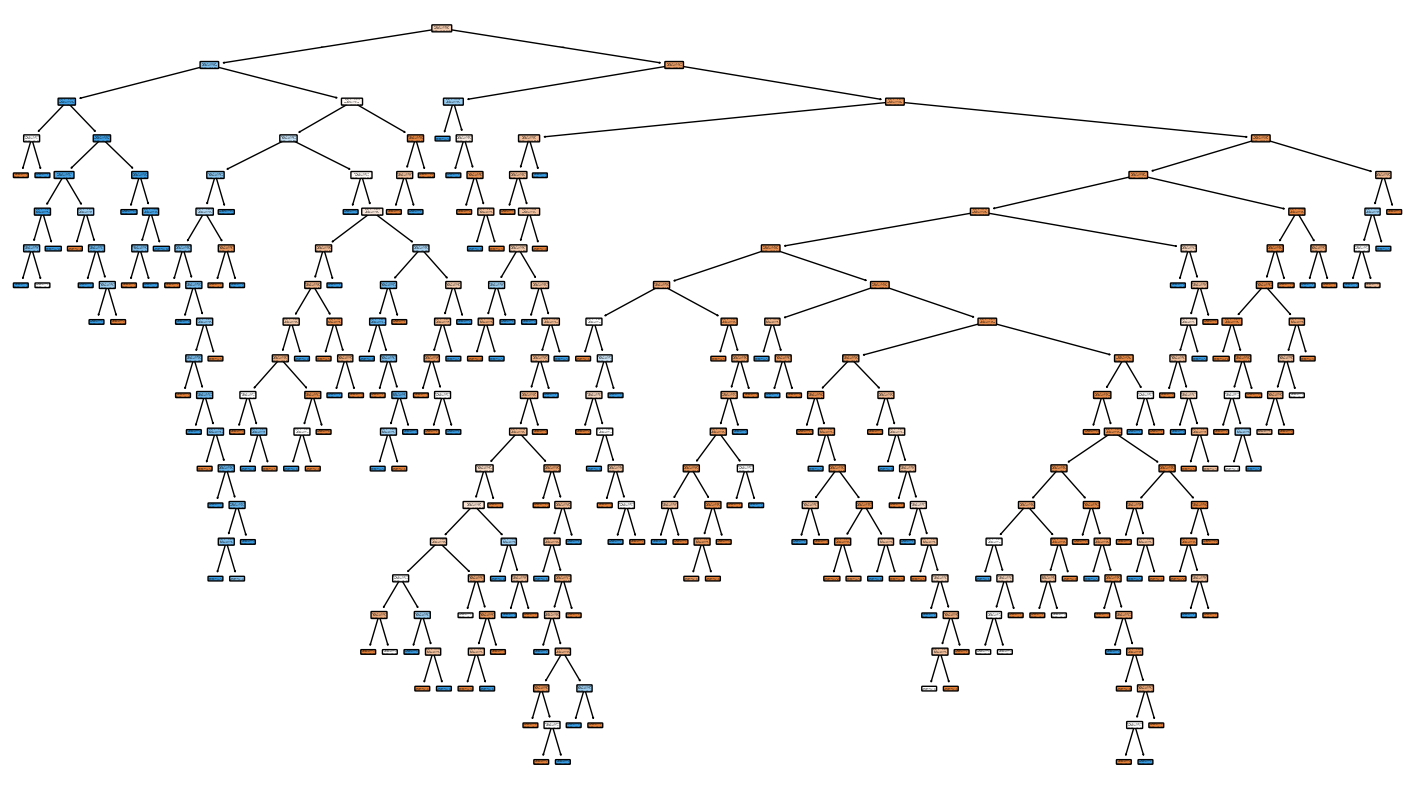

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(classifier,
          filled=True,
          rounded=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion='gini',
    max_depth=4
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

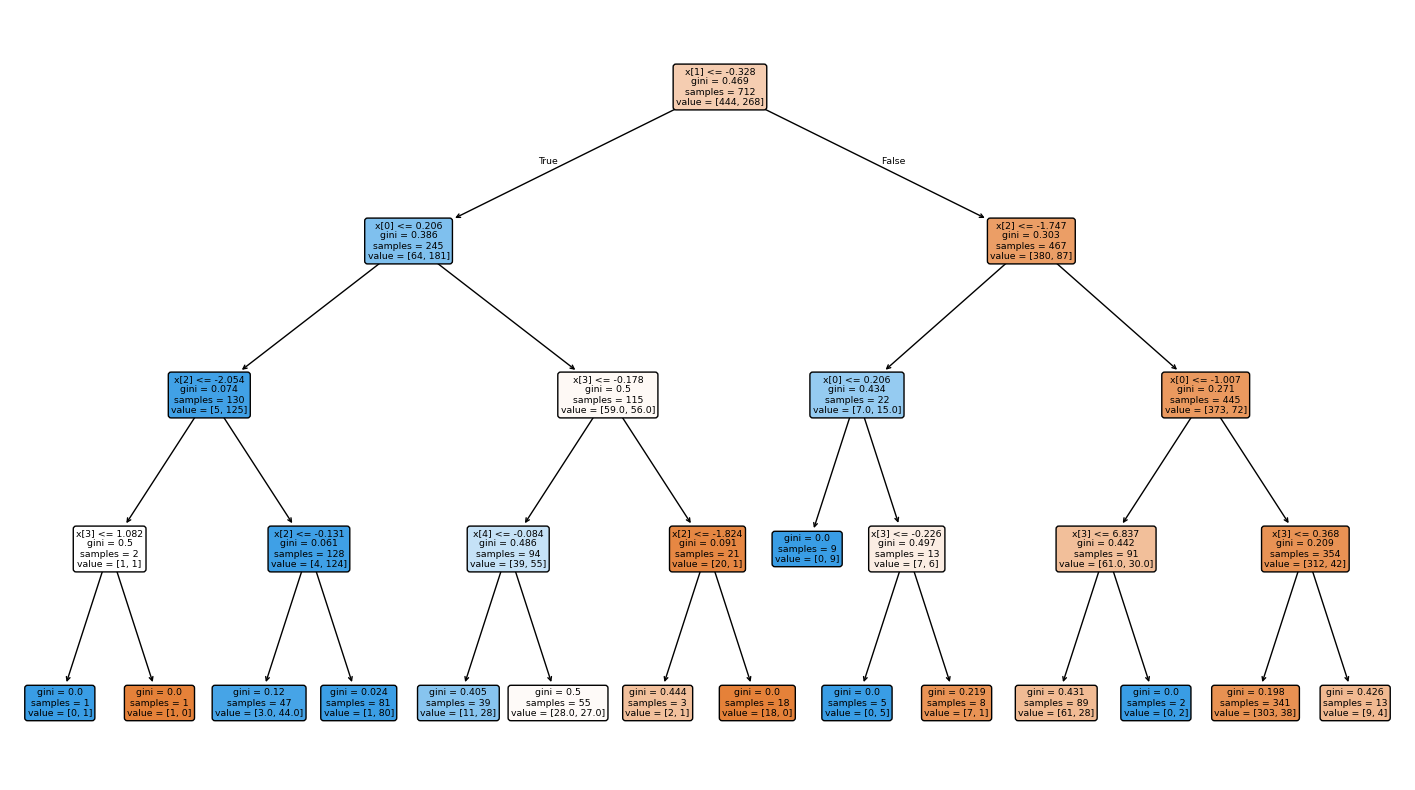

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(classifier,
          filled=True,
          rounded=True)
plt.show()

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[96,  9],
       [27, 47]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7988826815642458

In [ ]:
new_passenger=pd.DataFrame([[2,1,35,9,3]],columns=x.columns)
new_passenger

,pclass,sex,age,fare,embarked
0,2,1,35,9,3


In [ ]:
prediction=classifier.predict(new_passenger)
prediction

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0])

In [ ]:
print("survived" if prediction[0]==1 else "not survived")

not survived


banking dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/bank_marketing_dataset.csv')
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df=df[['age','job','balance','loan','contact','deposit']]
df.head()

,age,job,balance,loan,contact,deposit
0,59,admin.,2343,no,unknown,yes
1,56,admin.,45,no,unknown,yes
2,41,technician,1270,no,unknown,yes
3,55,services,2476,no,unknown,yes
4,54,admin.,184,no,unknown,yes


In [ ]:
X = df.drop('deposit', axis=1)
y = df['deposit']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y = le_target.fit_transform(y)


In [ ]:

X.head()

,age,job,balance,loan,contact
0,59,admin.,2343,no,unknown
1,56,admin.,45,no,unknown
2,41,technician,1270,no,unknown
3,55,services,2476,no,unknown
4,54,admin.,184,no,unknown


In [ ]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols


Index(['job', 'loan', 'contact'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [ ]:

X.head()

,age,job,balance,loan,contact
0,59,0,2343,0,2
1,56,0,45,0,2
2,41,9,1270,0,2
3,55,7,2476,0,2
4,54,0,184,0,2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.658307210031348


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[717 449]
 [314 753]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1166
           1       0.63      0.71      0.66      1067

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233



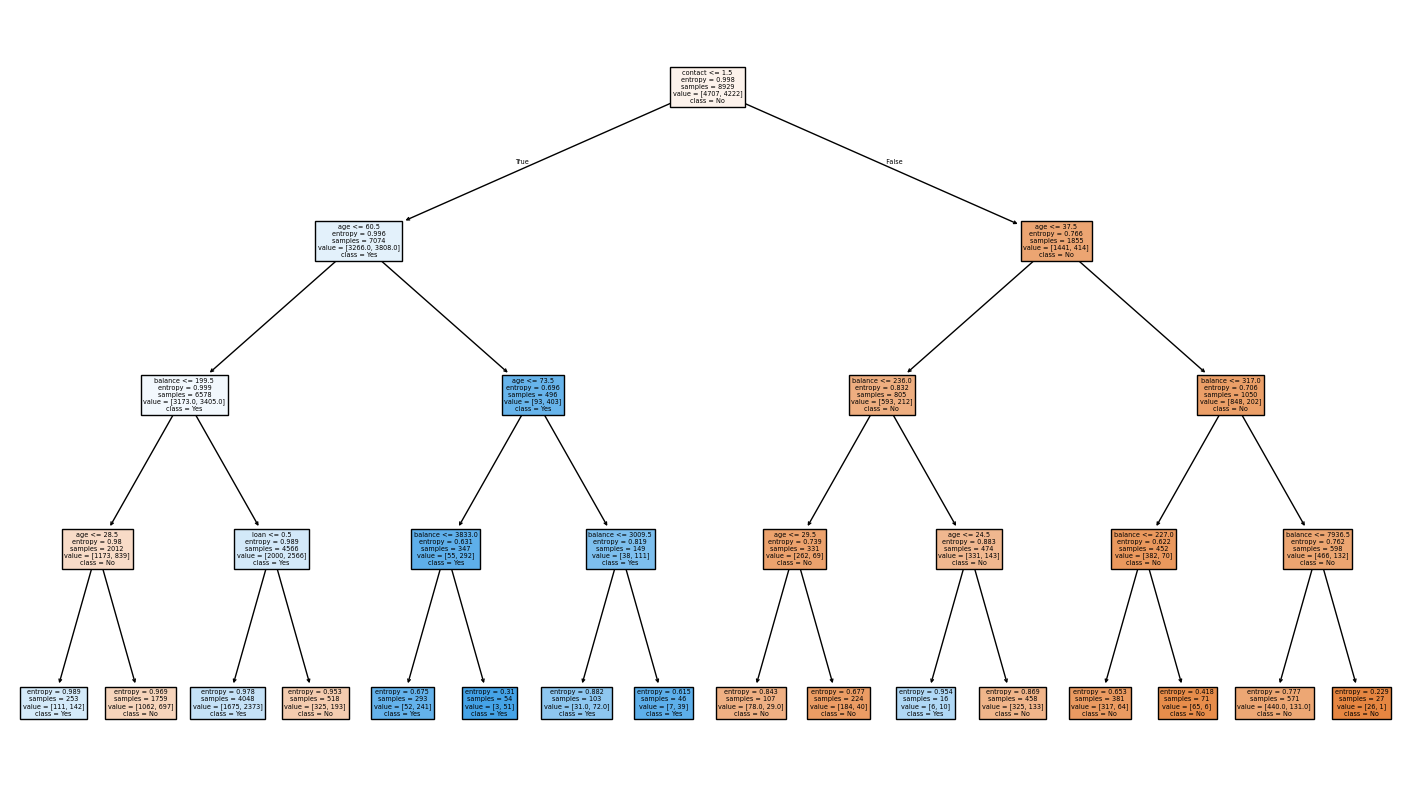

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()

In [ ]:
new_customer = pd.DataFrame({
    'age': [35],
    'balance': [1500],
    'job': ['management'],
    'loan': ['no'],
    'contact': ['cellular']
})

new_customer = pd.get_dummies(new_customer)
new_customer = new_customer.reindex(columns=X.columns, fill_value=0)

prediction = model.predict(new_customer)

print(prediction)

if prediction[0] == 'yes':
    print("Likely to subscribe to the deposit")
else:
    print("Not likely to subscribe to the deposit")

[1]
Not likely to subscribe to the deposit


In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['age', 'job', 'balance', 'loan', 'contact'], dtype='object')

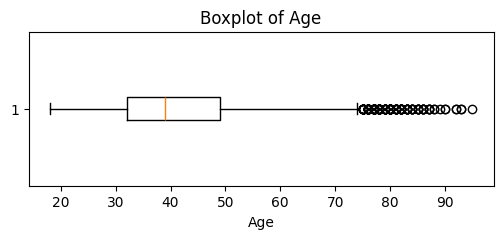

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,2))
plt.boxplot(df['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


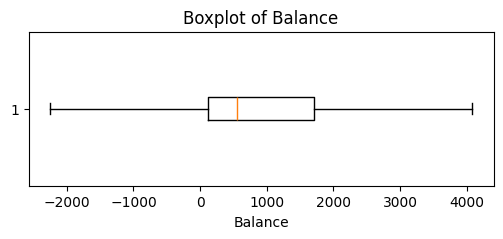

In [ ]:
plt.figure(figsize=(6,2))
plt.boxplot(df['balance'], vert=False)
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.show()


In [ ]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_balance = Q1 - 1.5 * IQR
upper_balance = Q3 + 1.5 * IQR


In [ ]:
df['balance'] = df['balance'].clip(lower_balance, upper_balance)


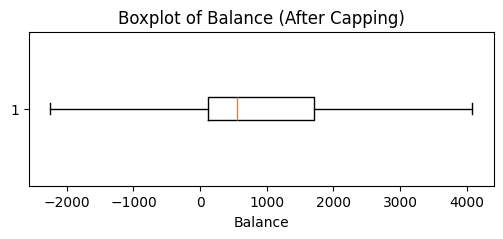

In [ ]:
plt.figure(figsize=(6,2))
plt.boxplot(df['balance'], vert=False)
plt.title('Boxplot of Balance (After Capping)')
plt.xlabel('Balance')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.658307210031348


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[717 449]
 [314 753]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1166
           1       0.63      0.71      0.66      1067

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233



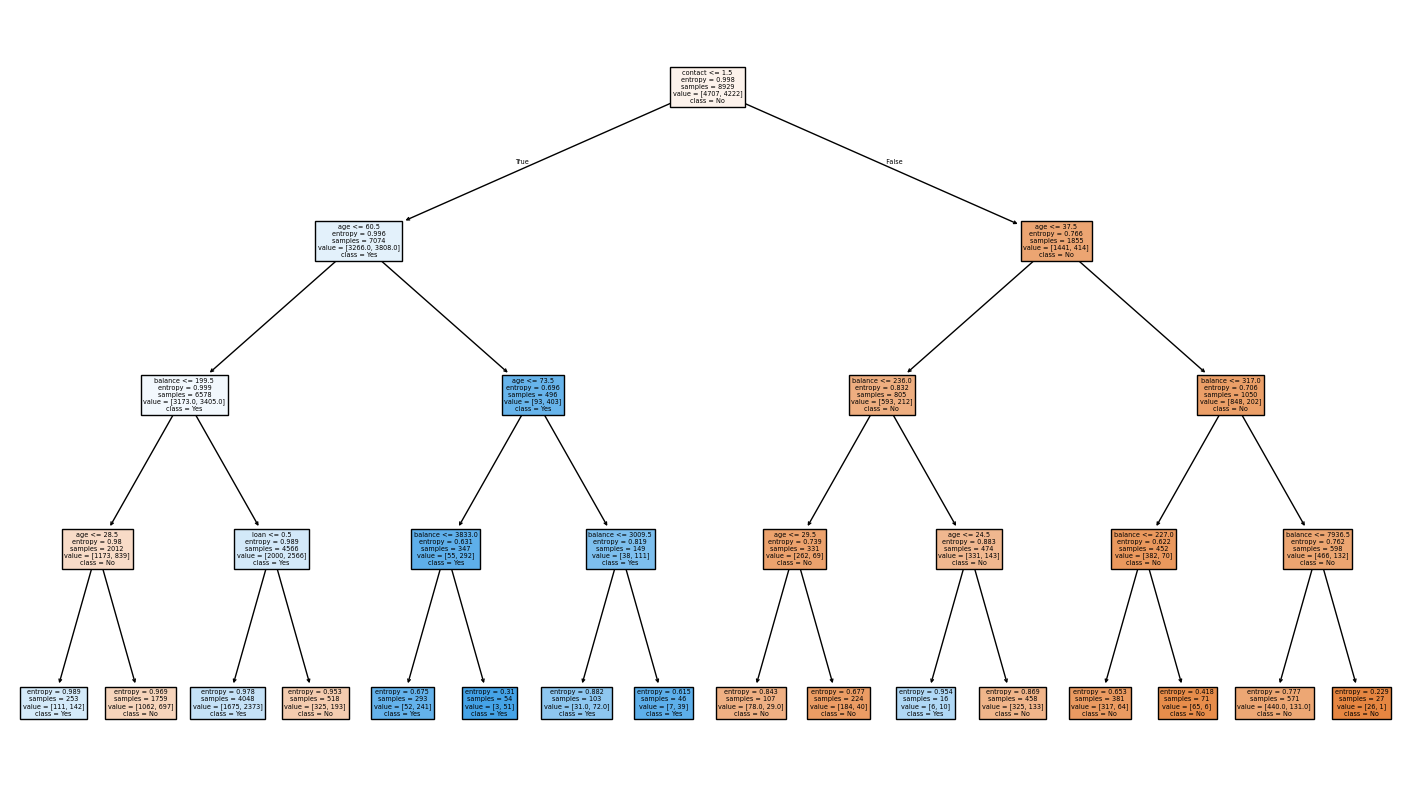

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()